In [1]:
from magnetization import *
import numpy as np
import matplotlib.pyplot as plt

lamb = 0.2
lamb_tag = "0_2"
T = 2
#Definition of the analytical form of err_Mz
get_err_Mz = lambda t: np.sqrt( (2*lamb**2 + 1 + np.cos(4*t*np.sqrt(lamb**2+1))) ) * np.sqrt(1 - np.cos(4*t*np.sqrt(lamb**2+1))) / (2 + 2*lamb**2)
get_Mz = lambda t: (2*lamb**2 + 1 + np.cos(4*t*np.sqrt(lamb**2+1))) / (2*lamb**2 + 2)

#Load of the data
Mz = np.loadtxt("simulator/Mz_lambda_"+lamb_tag+".txt")
stdv_Mz = np.loadtxt("simulator/stdv_Mz_lambda_"+lamb_tag+".txt")
stdv_mean_Mz = np.loadtxt("simulator/stdv_mean_Mz_lambda_"+lamb_tag+".txt")
t_axis = np.loadtxt("simulator/times_lambda_"+lamb_tag+".txt")

#Calculation of data for the exact solution
err_Mz_exact = []
Mz_exact = []
t_axis_exact = np.linspace(0,T,200)
for t in t_axis_exact:
    err_Mz_exact.append(get_err_Mz(t))
    Mz_exact.append(get_Mz(t))

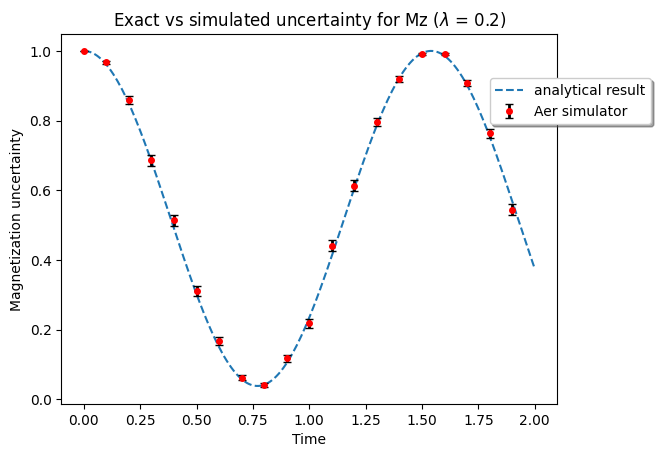

In [2]:
plt.plot(t_axis_exact,Mz_exact,'--',label="analytical result")
plt.errorbar(t_axis,Mz,yerr=stdv_mean_Mz,fmt='ro',label="Aer simulator", markersize="4", elinewidth=2, ecolor="black", capsize=3)
plt.title("Exact vs simulated uncertainty for Mz (" + r"$\lambda$" + " = " + str(lamb) + ")")
plt.xlabel("Time")
plt.ylabel("Magnetization uncertainty")
plt.legend(bbox_to_anchor=(0.85,0.9),fancybox=True,shadow=True,fontsize=10)
plt.savefig("simulator/simulator_graph_lambda_" + lamb_tag, bbox_inches="tight")

plt.show()

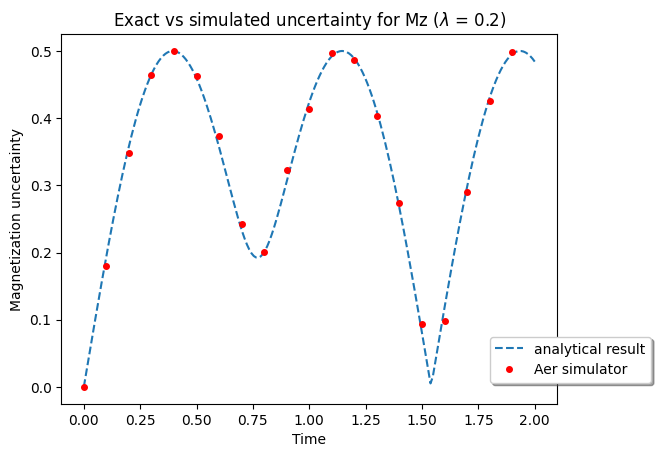

In [3]:
plt.plot(t_axis_exact,err_Mz_exact,'--',label="analytical result")
plt.plot(t_axis,stdv_Mz,'or',label="Aer simulator", markersize="4")
plt.title("Exact vs simulated uncertainty for Mz (" + r"$\lambda$" + " = " + str(lamb) + ")")
plt.xlabel("Time")
plt.ylabel("Magnetization uncertainty")
plt.legend(bbox_to_anchor=(0.85,0.2),fancybox=True,shadow=True,fontsize=10)
#plt.savefig("simulator/simulator_graph_err_lamb_" + lamb_tag, bbox_inches="tight")

plt.show()